In [1]:
pip install tensorflow numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values between 0 


11490434/11490434 [==============================] - 198s 17us/step


In [2]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2417 - accuracy: 0.9289
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0984 - accuracy: 0.9701
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0709 - accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0534 - accuracy: 0.9827
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0414 - accuracy: 0.9867


In [3]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)


313/313 - 1s - loss: 0.0766 - accuracy: 0.9759 - 642ms/epoch - 2ms/step

Test accuracy: 0.9758999943733215


313/313 [==============================] - 1s 2ms/step


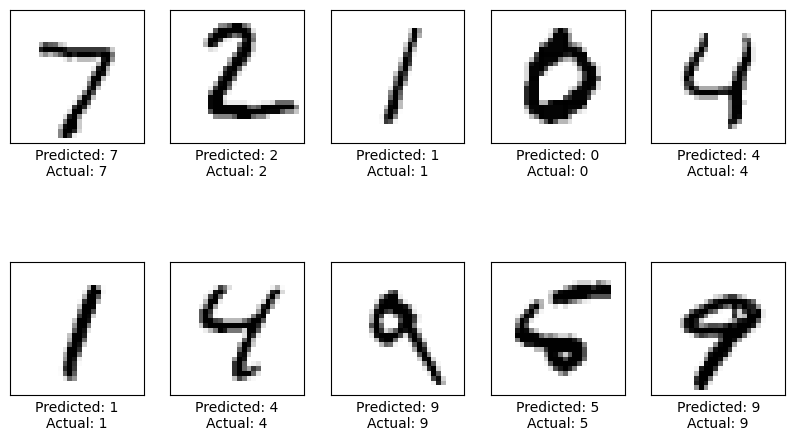

In [4]:
predictions = model.predict(X_test)

# Visualize some predictions
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {tf.argmax(predictions[i])}\nActual: {y_test[i]}")
    plt.xticks([])
    plt.yticks([])

plt.show()
